In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classlabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(classlabels)

80

### Read an Image

In [7]:
img = cv2.imread('image.webp')

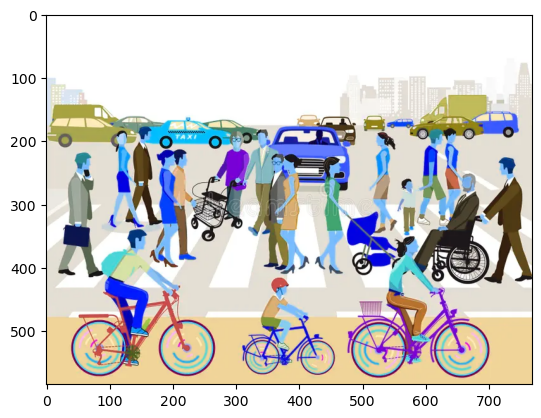

In [8]:
plt.imshow(img)

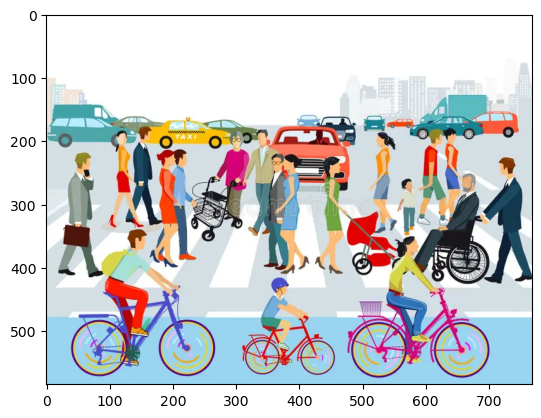

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000023B24E268B0>

In [11]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[ 1  1  1  1  1  2  1  3  3  3  1 28  3]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0],boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

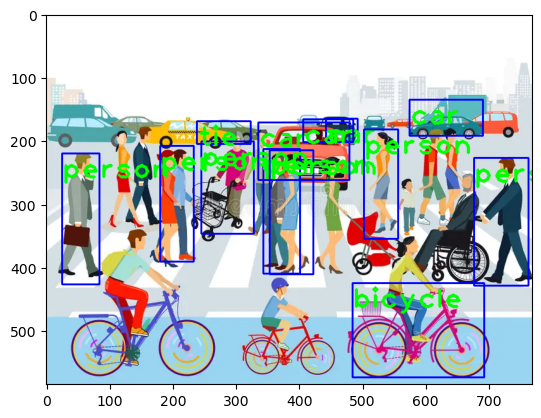

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Video 

In [33]:
cap = cv2.VideoCapture("tms.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOERROR('cannot open video')

font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('Highway',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[ 3  3  3  3  3  1  1 10  1]
[ 3  3  3  3  3  1  1 10  1]
[3 3 3 3 3 3 1 1 1 1 1]
[3 3 3 3 3 3 1 1 1 1 1]
[3 3 3 3 1 1 3 3 1 1 1 1 8]
[3 3 3 3 1 3 1 3 1 1 1 1 8]
[ 3  3  3  3  3  1  1  3  1  3  3  1  1  1 10]
[ 3  3  3  3  3  1  1  3  1  3  3  1  1  1 10]
[3 3 3 3 1 1 1 3 1 3 1 1 1 3 3]
[3 3 3 3 1 1 1 3 1 3 1 1 1 3 3]
[3 3 3 3 1 3 1 1 1 1 1 3 3]
[3 3 3 3 1 1 3 1 1 1 1 3 3]
[ 3  3  3  3  3  1  1  1  1  1  3  3 10]
[3 3 3 3 3 1 1 1 1 1 3]
[3 3 3 3 1 1 1 3]
[3 3 3 3 1 1 1 3]
[3 3 3 3 3 3 1 1 1 3 3 1]
[3 3 3 3 3 3 1 1 1 3 3]
[3 3 3 3 3 3 1 1 1 1 3 1 3]
[3 3 3 3 3 3 1 1 1 1 3 1 3]
[3 3 3 3 3 3 1 1 1 3 3]
[3 3 3 3 3 3 1 1 1 3 3]
[3 3 3 3 3 1 1 1 1 3 1 1 1 1 1]
[3 3 3 3 3 1 1 1 1 3 1 1 1 1]
[3 3 3 3 1 1 1 3 1 1 1 3 1]
[3 3 3 3 1 1 1 3 1 1 1 3 1 1]
[3 3 3 3 1 1 1 1 3 1 3 1 1 3 1]
[3 3 3 3 1 1 1 1 3 1 3 1 1 3 1]
[3 3 3 3 1 1 1 1 3 1 1 3 3]
[3 3 3 3 1 1 1 1 1 3 3 1 3 1]
[3 3 3 3 1 1 3 3 3 1 1 3]
